How many articles would you like to scrape?  15


Article Titles
---
1  .  Live updates: Russia's war in Ukraine | CNN  : Sentiment Analyis-  Neutral
---
2  .  Live updates: UAW strike expands significantly against GM and Stellantis | CNN Business  : Sentiment Analyis-  Good news!
---
3  .  East Coast storm: Developing tropical storm to deliver a wet and windy weekend | CNN  : Sentiment Analyis-  Good news!
---
4  .  F-35 fighter jet: 911 call reveals moments after crash | CNN  : Sentiment Analyis-  Neutral
---
5  .  iPhone 15 hits shelves around the world. Here's what you need to know | CNN Business  : Sentiment Analyis-  Neutral
---
6  .  School shootings in the US: Fast facts | CNN  : Sentiment Analyis-  Neutral
---
7  .  School district agrees to pay $27 million to family of 13-year-old in fatal bullying case | CNN  : Sentiment Analyis-  Neutral
---
8  .  Black Texas student given additional suspension for loc hairstyle as parents weigh legal action | CNN  : Sentiment Analyis-  Neutral
---
9  .  Teacher shortage: How schools are g

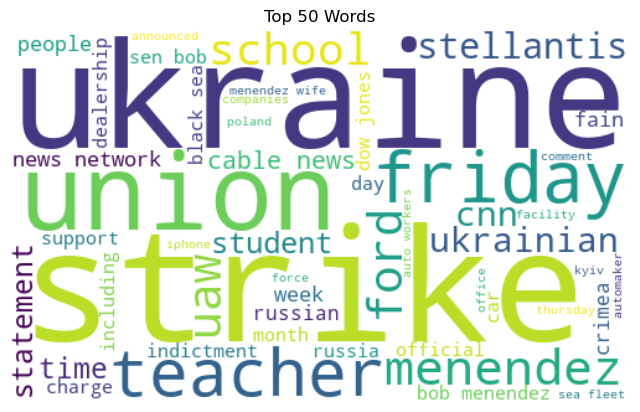

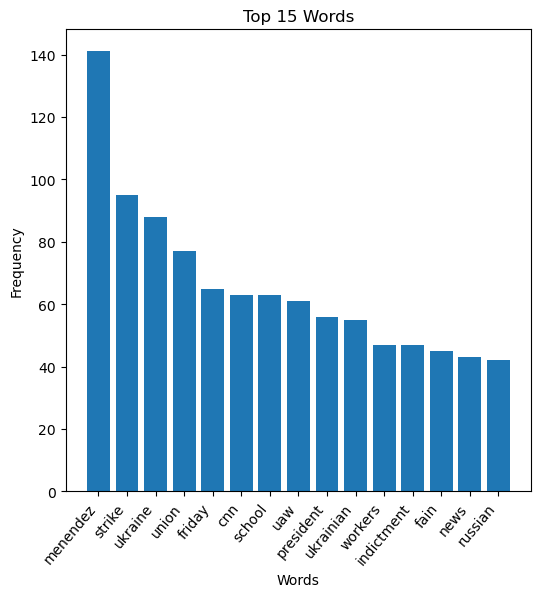

In [1]:
#Casey Cruz Web Scraper
#to use this you must install beautiful soup, lxml, textblob
#do this in the terminal (mac) or command prompt (win)
#do, pip install beautifulsoup4, pip install lxml, and pip install textblob
#you also needed to download english.txt from 
#https://www.kaggle.com/datasets/heeraldedhia/stop-words-in-28-languages?resource=download&select=english.txt
#you can also make a txt file in jupiter lab with all of the same words

import requests
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob

# get html text from url
initialSite = "https://www.cnn.com"
getHTML = requests.get(initialSite)
siteHTML = getHTML.text

#find articles from link
allArticles = re.findall(r'<a href="(/[^"]+)"', siteHTML)
topArticles = []
for newArticle in allArticles:
    if newArticle not in topArticles and "video" not in newArticle:
        topArticles.append(newArticle)

#user input
while True:
    numInput = int(input("How many articles would you like to scrape? "))      
    topArticles = topArticles[:numInput]
    if numInput < len(allArticles) and numInput > 0:
        break
    else:
        print("Enter a valid number")
       
#store titles, # of words each article, and list of all words
titles = []
wordCount = []
wordList = []
sentimentAnalysis = []

for articleLink in topArticles:
    #Titles
    if "live-news" in articleLink:
        articleURL = f"{initialSite}/{articleLink}"
    else:
        articleURL = f"{initialSite}{articleLink}"

    txt = requests.get(articleURL)
    articleHTML = txt.text
    
    #find the title of the specific article
    findTitle = re.search(r'<title>(.*?)</title>', articleHTML)
    if findTitle:
        title = findTitle.group(1)
        titles.append(title)
    else:
        titles.append("Missing")
    
    #Get words from articles
    articletext = requests.get(articleURL)
    articleHTML = articletext.text
    soup = BeautifulSoup(articleHTML, 'html.parser')
    paragraphs = soup.find_all('p')
    
    articleWords = []
    for paragraph in paragraphs:
        #could just look through and identify where spaces are
        pWords = re.findall(r'\b\w+\b', paragraph.get_text())
        pWords = [word.lower() for word in pWords]
        wordList.extend(pWords)
        articleWords.extend(pWords)
 
    numWords = len(articleWords)
    wordCount.append(numWords)
    
    #sentiment analysis of article
    toAnalyze = ' '.join(articleWords)
    analysis = TextBlob(toAnalyze)
    score = analysis.sentiment.polarity
    
    if score > 0.1:
        sentimentAnalysis.append("Good news!")
    elif score < -0.1:
        sentimentAnalysis.append("Bad news!")
    else:
        sentimentAnalysis.append("Neutral")
    
    
print("Article Titles")
for x in range(len(titles)):
    print("---")
    print((x+1), " . ", titles[x], " : Sentiment Analyis- ",sentimentAnalysis[x])

#calculate mean/median of words, & overall sentiment
#mean
totalSum = 0
for num in range(len(wordCount)):
    totalSum += wordCount[num]
    
mean = totalSum/len(wordCount)
print("Mean = ", mean)

#median
median = 0
wordCount.sort()
listSize = len(wordCount)
if listSize % 2 == 0:
    medL = wordCount[listSize // 2 - 1]
    medR = wordCount[listSize // 2]
    median = (medL + medR) / 2
else:
    median = wordCount[listSize // 2]
print("Median = ", median)

#sentiment
sent = "None"
good = sentimentAnalysis.count("Good News!")
bad = sentimentAnalysis.count("Bad News!")
neut = sentimentAnalysis.count("Neutral")

if good > bad and good >= nuet:
    sent = "good"
elif bad > good and bad >= neut:
    sent = "bad"
else:
    sent = "neutral"
    
print("The overall sentiment of all articles is", sent)

#word cloud & bar chart
#removing stop words
stop_words = []
with open('english.txt', 'r') as file:
    stop_words = [word.lower() for word in file.read().split()]

filteredWords = [word.lower() for word in wordList if word.lower() not in stop_words]

#wordlist
wordcloud = WordCloud(width=500, height=300, max_words=50, background_color='white').generate(' '.join(filteredWords))
    
#Word Cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top 50 Words")
plt.show()

#count occurence of each word
word_frequency = Counter(filteredWords)
top15frequent = word_frequency.most_common(15)
#( {"word", freq} )
#unpack list of tuples to words and numbers to plot 
wrds, freq = zip(*top15frequent)

#Bar Chart
plt.figure(figsize=(6, 6))
plt.bar(wrds, freq)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 15 Words")
#no overlap
plt.xticks(rotation=50, ha='right')
plt.show()